In [1]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset = pd.DataFrame(df.data)


In [11]:
dataset.columns = df.feature_names
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [12]:
X = dataset
y = df.target

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
#lasso_regressor =Lasso()
lasso=Lasso()
tuned_parameters = {'alpha':[1,2,5,10,15,20,25,35,45,55,60,75,85,90,100]}
clf = GridSearchCV(lasso, tuned_parameters, cv=5)

In [24]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 15, 20, 25, 35, 45, 55, 60, 75,
                                   85, 90, 100]})

In [28]:
lasso_pred=clf.predict(X_test)

In [30]:
print(clf.best_params_)
print(clf.best_score_)

{'alpha': 1}
-0.0006416906415077417


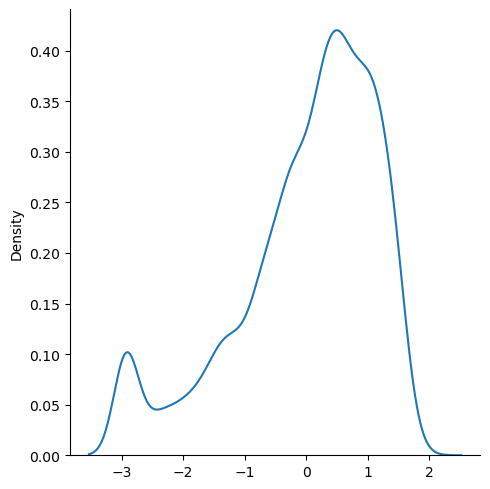

In [31]:
import seaborn as sns
sns.displot(lasso_pred-y_test,kind='kde')